**Data Visualization 101**

[Andrew Wheeler, PhD](mailto:andrew.wheeler@hms.com)

This is the jupyter notebook to go along with the Data Science Learning section on Data Visualization 101. This dataset is a set of aggregated summary statistics from my Payment Integrity Project.

In [1]:
# Import all the libraries 
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import sys
import os

dat_dir = r'C:\Users\e009156\Documents\GitHub\data-science-utils\education\Intro_DataScience\DataViz_101'
os.chdir(dat_dir)
sys.path.append(dat_dir)
import hms_plotstyle #my person python plotting functions

time_dat = pd.read_excel('ExampleTables.xlsx', sheet_name='Original')
time_dat

,cyclenum,RunDate,TotalClaims,TotalSavings,AverageSavings,EstimatedFindingRate
0,0,2020-04-01 18:02:38.054,1186,3.993279e+05,336.701471,0.356004
1,1,2020-05-01 15:54:17.446,618,1.585647e+05,256.577260,0.309207
2,2,2020-05-11 16:57:34.134,1400,4.117936e+05,294.138274,0.355822
3,3,2020-06-01 19:05:02.054,1251,6.325635e+05,505.646269,0.454262
4,4,2020-06-18 19:57:53.253,1082,3.513542e+05,324.726622,0.315310
5,5,2020-06-29 18:25:44.647,2571,1.141862e+06,444.131661,0.337627
6,6,2020-07-06 18:20:50.294,7905,2.973833e+06,376.196427,0.325196
7,7,2020-07-13 13:45:39.219,5649,2.300208e+06,407.188491,0.359232
8,8,2020-07-20 15:05:38.248,2883,1.246279e+06,432.285598,0.313340
9,9,2020-07-27 13:30:38.105,2623,8.948515e+05,341.155720,0.333882


In [2]:
#Some nice print format functions for tables
format_dict = {'RunDate':'{:%m-%d-%Y}', 'TotalClaims': '{:,}', 'TotalSavings': '${:,.0f}', 
               'AverageSavings': '${:,.2f}', 'EstimatedFindingRate': '{:.2f}'}

time_dat.style.format(format_dict).hide_index()

cyclenum,RunDate,TotalClaims,TotalSavings,AverageSavings,EstimatedFindingRate
0,04-01-2020,"1,186","$399,328",$336.70,0.36
1,05-01-2020,618,"$158,565",$256.58,0.31
2,05-11-2020,"1,400","$411,794",$294.14,0.36
3,06-01-2020,"1,251","$632,563",$505.65,0.45
4,06-18-2020,"1,082","$351,354",$324.73,0.32
5,06-29-2020,"2,571","$1,141,862",$444.13,0.34
6,07-06-2020,"7,905","$2,973,833",$376.20,0.33
7,07-13-2020,"5,649","$2,300,208",$407.19,0.36
8,07-20-2020,"2,883","$1,246,279",$432.29,0.31
9,07-27-2020,"2,623","$894,851",$341.16,0.33


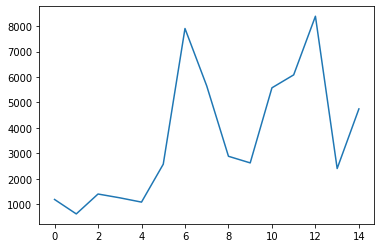

In [3]:
#Making a simple line graph
fig, ax = plt.subplots()
ax.plot(time_dat['cyclenum'], time_dat['TotalClaims'])
plt.show()

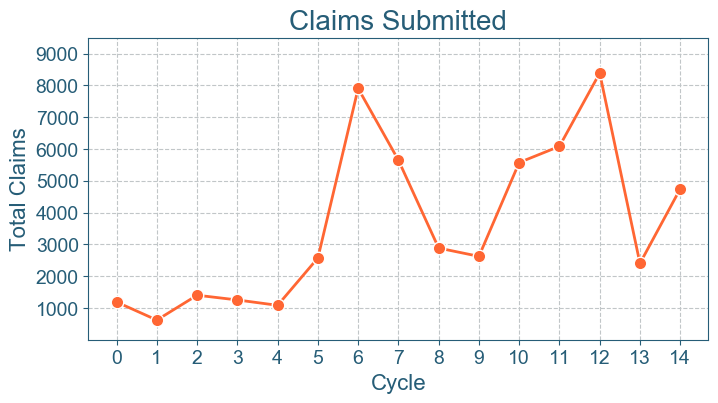

In [4]:
#Updating the HMS plot style
matplotlib.rcParams.update(hms_plotstyle.hms_style)

#Redoing the same chart, updating nicer names and styles
fig, ax = plt.subplots(figsize=(8,4)) #making the dimensions bigger and wider

#Setting the style for the line and marker
ax.plot(time_dat['cyclenum'], time_dat['TotalClaims'], 
        marker='o', markeredgecolor='w', 
        linewidth=2, markersize=9)

#X, Y axis and title
ax.set_ylabel('Total Claims')
ax.set_xlabel('Cycle')
plt.title('Claims Submitted')

#Setting y limit to include 0
ax.set_ylim(0, 9500)

#Setting the X and Y ticks
plt.xticks(range(time_dat['cyclenum'].max()+1))
plt.yticks(np.linspace(1000,9000,9))

#Saving the file to a high res PNG file
plt.savefig('LineChart.png', dpi=500, bbox_inches='tight')
plt.show()

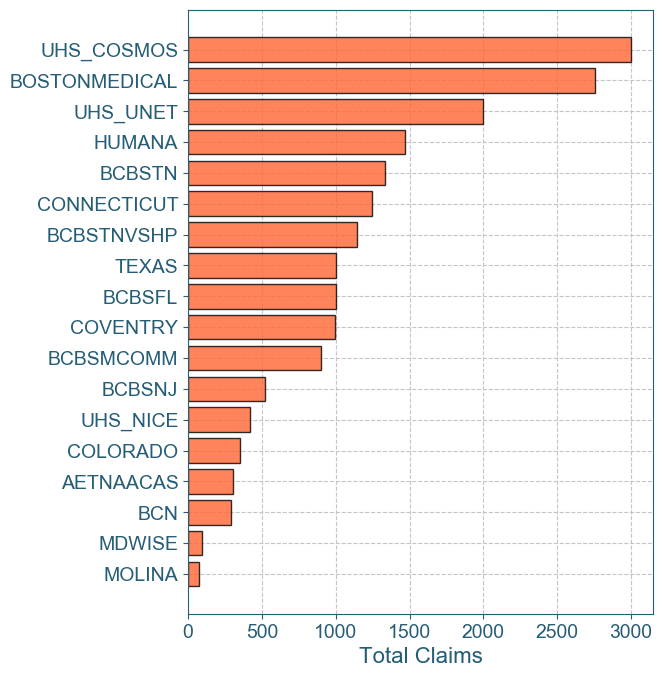

In [5]:
#This is another set of aggregate data, but by client instead of time period 
bar_dat = pd.read_excel('ExampleTables.xlsx', sheet_name='ClientName_Orig')

#Ordering the data
bar_dat.sort_values(by='# Claims', inplace=True)

#Plot the finding rate per client
fig, ax = plt.subplots(figsize=(6,8))
ax.barh(bar_dat['Client Name'], bar_dat['# Claims'],
        edgecolor='black', alpha=0.8)
ax.set_xlabel('Total Claims')
plt.savefig('BarChart.png', dpi=500, bbox_inches='tight')
plt.show()